<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/release/landlab_header.png"></a>

## Introduction to Landlab Components

A "potluck supper" is a common American tradition in which each guest brights a dish to share. These contributed dishes usually come in one of a few categories: salads, drinks,  main dishes, desserts. The meal comes together as a collection of components, each of which contributes to fulfilling one of these basic roles. The resulting meal provides guests with a great variety of choices. A guest can compose their own complete and unique meal by combining their own choices for components. And each guest, while contributing their own particular dish, get to share in the creations of their compatriots. There's a bit of standardization---the dishes are sized to fit on the tables, and their contents are accessible to the usual range of serving utensils---but with that standardization lies a great range of creativity.

Component modeling is a bit like the potluck tradition: one can construct a complete simulation by assembling components to represent the different parts of the system to be modeled. In Landlab, a **component** is a semi-standardized Python *class* that represents a particular process or calculation. Components are not stand-alone programs, but rather are designed to be used within another Python program that creates an integrated model or workflow.

<img src="./media/potluck.jpeg"
     width = "600"
     height = auto />
*Figure 1: A potluck meal (wikimedia commons).*


### Examples of Landlab Components

#### Infiltration and overland flow

Here's an example from the Landlab tutorial *Green-Ampt infiltration and kinematic wave overland flow*. The example code in the tutorial uses two components, `SoilInfiltrationGreenAmpt` and `KinwaveImplicitOverlandFlow`, to calculate overland flow and infiltration across a terrain that is represented by a digital elevation model.

![bijou_gully_topography.png](attachment:bijou_gully_topography.png)
*Figure 2: topography of a gullied area on the Colorado high plains (from Landlab tutorial "Green-Ampt infiltration and kinematic wave overland flow").*



![bijou_gully_infiltration.png](attachment:bijou_gully_infiltration.png)

*Figure 3: cumulative infiltration water depth during a simulated five-minute heavy rainfall (from Landlab tutorial "Green-Ampt infiltration and kinematic wave overland flow")*

The following code snippets illustrate how the components are imported...

```python
from landlab.components import (
    SoilInfiltrationGreenAmpt,
    KinwaveImplicitOverlandFlow
)
```

...instantiated...

```python
ga = SoilInfiltrationGreenAmpt(grid)

kw = KinwaveImplicitOverlandFlow(
    grid, runoff_rate=90.0, roughness=0.1, depth_exp=5.0 / 3.0
)
```

...and run in a time loop:

```python
for i in range(nsteps):
    kw.run_one_step(dt)
    ga.run_one_step(dt)
```

### The Landlab component collection

The current (spring 2022) collection of components spans a variety of types of process and analysis. You can find a list [in the documentation](https://landlab.readthedocs.io/en/latest/reference/components/index.html).

To see a list, you can use the following python commands:

In [1]:
from landlab.components import COMPONENTS

[component.__name__ for component in COMPONENTS]

['AreaSlopeTransporter',
 'BedrockLandslider',
 'CarbonateProducer',
 'ChannelProfiler',
 'ChiFinder',
 'DepressionFinderAndRouter',
 'DepthDependentDiffuser',
 'DepthDependentTaylorDiffuser',
 'DepthSlopeProductErosion',
 'DetachmentLtdErosion',
 'DischargeDiffuser',
 'DimensionlessDischarge',
 'DrainageDensity',
 'ErosionDeposition',
 'ExponentialWeatherer',
 'ExponentialWeathererIntegrated',
 'FastscapeEroder',
 'FireGenerator',
 'Flexure',
 'Flexure1D',
 'FlowAccumulator',
 'PriorityFloodFlowRouter',
 'FlowDirectorD8',
 'FlowDirectorDINF',
 'FlowDirectorMFD',
 'FlowDirectorSteepest',
 'FractureGridGenerator',
 'gFlex',
 'GravelRiverTransporter',
 'GroundwaterDupuitPercolator',
 'HackCalculator',
 'HeightAboveDrainageCalculator',
 'KinematicWaveRengers',
 'KinwaveImplicitOverlandFlow',
 'KinwaveOverlandFlowModel',
 'LakeMapperBarnes',
 'LandslideProbability',
 'LateralEroder',
 'LinearDiffuser',
 'LinearDiffusionOverlandFlowRouter',
 'ListricKinematicExtender',
 'LithoLayers',
 'Lit

### Sediment diffusion with a Landlab component

Finally, we'll take a look at how Landlab components can simplify model creation even further.

Recall that in the `for` loop above, you managed to create a working sediment diffusion model with just five lines of code. However, before running the `for` loop you had to independently create the fields and parameters involved in the diffusion problem. <b>This is where Landlab's component library comes in handy!</b>

The Landlab component library is composed of individual, interoperable code packages ("components") that each represent a single Earth surface process. Examples of components include flow routing algorithms, a variety of fluvial processes, and yes, soil processes! 

In this final part of our clinic, we'll make use of Landlab's `LinearDiffuser` component to replicate our diffused fault scarp landscape. This time, we'll let the component do more of the work of field and parameter creation for us.

Start by importing the component `LinearDiffuser` from `landlab.components`.

In [1]:
from landlab import RasterModelGrid
from landlab.components import LinearDiffuser

Great, we've imported a component which is going to help us build a diffusion model. Before we really start to use this component, though, we want to get some basic information on how it works. This information is stored in component "properties." One such property is `input_var_names`. Call any property using the syntax `ComponentName.property_name`.

In [2]:
# check out input variable names
LinearDiffuser.input_var_names

('topographic__elevation',)

This tells us that the only input variable required by this component is an elevation field, so we'll need to create that ourselves. 

Other standard properties are `output_var_names` and `optional_var_names`; pass an input or output name to `var_loc`, `var_type`, `var_units`, and `var_definition` to get the centering ('node', 'link', etc), array dtype (float, int), units (meters, etc) and a descriptive string, respectively. `var_help` will give you a lot of this information at once:

In [3]:
# ask for info related to the input variable 'topographic__elevation'
LinearDiffuser.var_help("topographic__elevation")

name: topographic__elevation
description:
  Land surface topographic elevation
units: m
unit agnostic: True
at: node
intent: inout


If we want to see the complete documentation, we can also access this information using `?`, similar to how we accessed information from `RasterModelGrid` in part [Explore the Landlab grids](#Explore-the-Landlab-grids).

In [ ]:
# recall the question mark notation used to access documentation in Landlab
?LinearDiffuser

Note we haven't needed to <i>instantiate</i> the component in order to access any of this information. Instantiation occurs when we create a unique instance of the component with specific variables and parameter values (just like how we created <i>instances</i> of `RasterModelGrid` above with unique names, dimensions, and grid spacing.) Don't worry if this is confusing right now - it will make sense momentarily. 

Since we know `LinearDiffuser` requires a topographic elevation field in order to be instantiated, we need to create that field. Recall that `topographic__elevation` is tied to grid nodes, so we actually need to create a grid instance, and add the `topographic__elevation` field onto the grid. This is just like the steps we took in part [Sediment diffusion](#Sediment-diffusion) of this tutorial.

Create a new grid instance for the `LinearDiffuser` component to run on. Give your new grid a new name (perhaps `new_grid`?), but give it the same dimensions as `mg` (25 x 25, with 10m spacing).

In [ ]:
# create a new grid here

In [4]:
grid = RasterModelGrid((25, 25), 10)

Great, we now have a grid on which we can implement our diffusion component. Recall, however, our diffusion equation from above:

$$\frac{\partial z}{\partial t} = D \nabla^2 z$$

As before, we need some topographic variation in order to drive diffusion. We'll still need to add our `topographic__elevation` field manually, and we'll need to create a "fault" on the grid by elevating half of the nodes. Let's do this now, following the format we used in [Sediment diffusion](#Sediment-diffusion).

In [ ]:
# add a field of zeros called "topographic__elevation" and attach it to the grid nodes
# save the field to an array with a new name

In [5]:
z = grid.add_zeros("topographic__elevation", at="node")

In [6]:
# now elevate the upper half of the landscape, following the `node_of_y` method used in part (d)

In [7]:
z[grid.y_of_node > 120] += 10

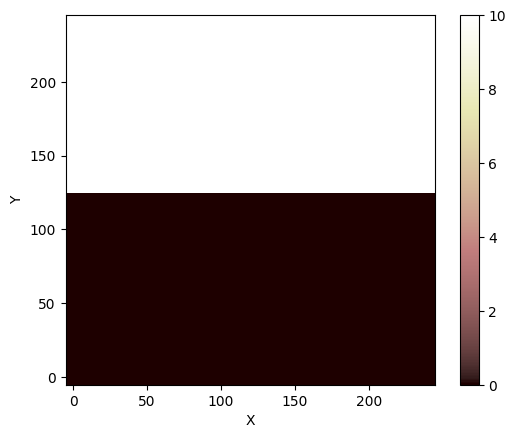

In [8]:
# now display the landscape
grid.imshow("topographic__elevation")

As in part [Sediment diffusion](#Sediment-diffusion), let's close the left and right grid boundaries.

In [10]:
# close left and right boundaries
grid.status_at_node[grid.nodes_at_left_edge] = grid.BC_NODE_IS_CLOSED
grid.status_at_node[grid.nodes_at_right_edge] = grid.BC_NODE_IS_CLOSED

Great, we're back where we started with a recently faulted, un-diffused landscape. But now, rather than building our own diffusion model from scratch, we'll let Landlab's `LinearDiffuser` component do the work for us. Create an instance of this component named `diffusion_model` and pass your grid to the component.

In [11]:
# instantiate the linear diffuser component here
diffusion_model = LinearDiffuser(grid)

Great, we now have an instance of our model. Next, use the `run_one_step` method with a timestep `dt` on `diffusion_model` in a `for` loop in order to evolve our faulted landscape. As in part [Sediment diffusion](#Sediment-diffusion), run the loop for 25 steps. Use the same timestep, `dt`, as defined above. 

In [ ]:
# create your for loop here
# hint: you only need two lines of code in this cell to run the model

In [18]:
for _ in range(25):
    diffusion_model.run_one_step(1000.0)

Great, now visualize your landscape to see if it looks similar to the 5-line model you created in part [Sediment diffusion](#Sediment-diffusion).

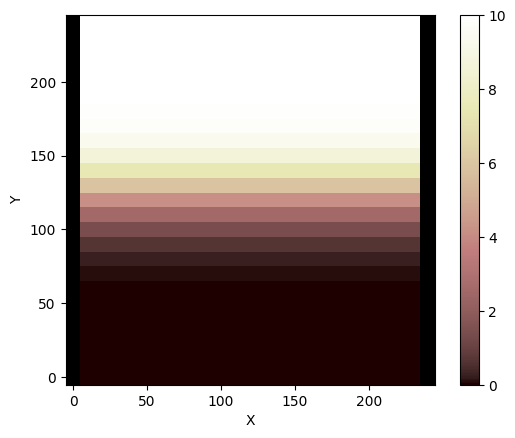

In [19]:
# visualize landscape
grid.imshow("topographic__elevation")

Fantastic! Your final output should look very simialr to the diffusion model you created in part [Sediment diffusion](#Sediment-diffusion), but here you can see that using a Landlab component to simulate the diffusion process has simplified your `for` loop even further. You can appreciate how valuable this simplicity is, especially if you wanted to couple several components together (for example, flow routing, fluvial erosion, and hillslope diffusion) in order to evolve a more complex landscape.

As a final, fun exercise, check out the `LinearDiffuser` documentation using `?` once again. See if you can find the list of input parameters. These are listed in the order of the arguments taken by the component; the first one will always be `grid`. 

In [ ]:
# check out the optional variables
?LinearDiffuser

- What is the name of this first optional argument? It is listed right after `grid`. Optional arguments have default values, which means the user does not need to specify its value. The user can, however, change the value if desired.
- What is its default value?
- Modify your existing instance of `LinearDiffuser` to include a different value for the first optional argument. 
> Hint: go back to the cell with the comment "instantiate the linear diffuser component here," and work from there
- Re-run the `for` loop to evolve the landscape, visualize the output, and note how changing the value of this optional argument impacts the form of the evolved landscape.

Congratulations on making it to the end of this tutorial!

**Click here for more** <a href="https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html">Landlab tutorials</a>